<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-linear-regression---exercise" data-toc-modified-id="Simple-linear-regression---exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple linear regression - exercise</a></span><ul class="toc-item"><li><span><a href="#Import-the-relevant-libraries" data-toc-modified-id="Import-the-relevant-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the relevant libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Create-the-regression" data-toc-modified-id="Create-the-regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Create the regression</a></span><ul class="toc-item"><li><span><a href="#Declare-the-dependent-and-the-independent-variables" data-toc-modified-id="Declare-the-dependent-and-the-independent-variables-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Declare the dependent and the independent variables</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Regression-itself" data-toc-modified-id="Regression-itself-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Regression itself</a></span></li><li><span><a href="#Plot-the-regression-line-on-the-initial-scatter" data-toc-modified-id="Plot-the-regression-line-on-the-initial-scatter-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Plot the regression line on the initial scatter</a></span></li></ul></li></ul></li></ul></div>

# Simple linear regression - exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data.

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
sns.set()

# seaborn warnings ignore
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
!ls

Simple Linear Regression Exercise.ipynb


In [3]:
df = pd.read_csv('../data/csv/real_estate_price_size.csv')
print(df.shape)
df.head()

(100, 2)


,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Create the regression

### Declare the dependent and the independent variables

In [4]:
x1 = df['size']
y = df['price']

### Explore the data

In [5]:
df.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


### Regression itself

In [6]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           8.13e-31
Time:                        10:06:20   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line on the initial scatter

In [7]:
results.params

const    101912.601801
size        223.178743
dtype: float64

In [8]:
b0, b1 = results.params

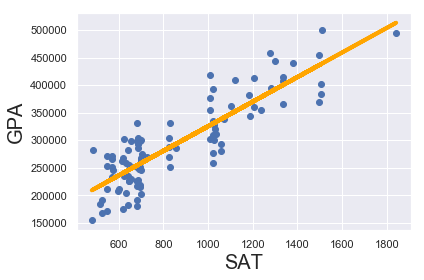

In [9]:
plt.scatter(x1,y)

yhat = x1*b1+b0
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

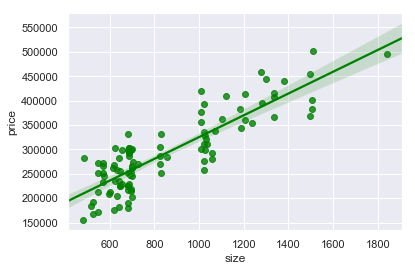

In [10]:
sns.regplot(x='size',y='price',data=df,color='green')

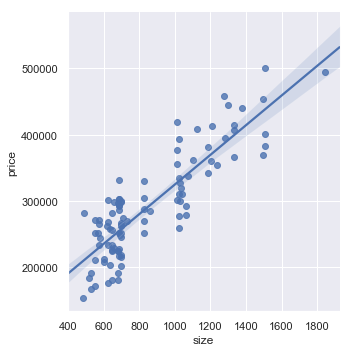

In [11]:
sns.lmplot(x='size',y='price',data=df,palette='Set1')